In [4]:
from osgeo import gdal
import numpy as np
import pandas as pd
import os
#import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../Functions')
import TiffTools as tt

%load_ext autoreload
%autoreload 2

In [2]:
folder = '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/NAIP/'

In [14]:
!ls /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/

m_3711701_ne_11_060_20220614.tif m_3811758_nw_11_060_20220616.tif
m_3711701_nw_11_060_20220614.tif m_3811758_se_11_060_20220614.tif
m_3711702_ne_11_060_20220614.tif m_3811758_sw_11_060_20220614.tif
m_3711702_nw_11_060_20220614.tif m_3811759_ne_11_060_20220616.tif
m_3711703_ne_11_060_20220710.tif m_3811759_nw_11_060_20220616.tif
m_3711703_nw_11_060_20220614.tif m_3811759_se_11_060_20220710.tif
m_3711704_nw_11_060_20220629.tif m_3811759_sw_11_060_20220614.tif
m_3711806_ne_11_060_20220614.tif m_3811760_nw_11_060_20220616.tif
m_3711806_nw_11_060_20220614.tif m_3811760_sw_11_060_20220629.tif
m_3711807_ne_11_060_20220614.tif m_3811846_ne_11_060_20220614.tif
m_3711807_nw_11_060_20220614.tif m_3811846_nw_11_060_20220614.tif
m_3711808_ne_11_060_20220614.tif m_3811846_se_11_060_20220614.tif
m_3711808_nw_11_060_20220614.tif m_3811846_sw_11_060_20220614.tif
m_3811741_ne_11_060_20220616.tif m_3811847_ne_11_060_20220614.tif
m_3811741_nw_11_060_20220616.tif m_3811847_nw_11_060_20220614.tif
m_3811741_

In [ ]:
# omit /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811752_nw_11_060_20220616.tif

In [16]:
# Merge 2019 and 2020 NAIP orthos
#!ls /Volumes/Extreme\ Pro/big_data/NAIP_MC/*2022*/*.tif
!gdal_merge /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711701_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711701_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711702_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711702_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711703_ne_11_060_20220710.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711703_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711704_nw_11_060_20220629.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711806_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711806_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711807_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711807_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711808_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3711808_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811741_ne_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811741_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811741_se_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811741_sw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811742_ne_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811742_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811742_se_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811742_sw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811743_ne_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811743_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811743_se_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811743_sw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811744_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811744_sw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811749_ne_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811749_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811749_se_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811749_sw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811750_ne_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811750_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811750_se_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811750_sw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811751_ne_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811751_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811751_se_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811751_sw_11_060_20220616.tif  /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811752_sw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811757_ne_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811757_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811757_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811757_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811758_ne_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811758_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811758_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811758_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811759_ne_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811759_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811759_se_11_060_20220710.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811759_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811760_nw_11_060_20220616.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811760_sw_11_060_20220629.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811846_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811846_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811846_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811846_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811847_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811847_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811847_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811847_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811848_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811848_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811848_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811848_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811854_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811854_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811854_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811854_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811855_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811855_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811855_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811855_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811856_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811856_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811856_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811856_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811862_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811862_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811862_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811862_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811863_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811863_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811863_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811863_sw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811864_ne_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811864_nw_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811864_se_11_060_20220614.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2022MC/m_3811864_sw_11_060_20220614.tif \
    -o /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMC.tif 

0...10...20...30...40...50...60...70...80...90...100 - done.


In [17]:
!gdal_merge /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711701_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811758_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711701_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811758_se_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711702_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811758_sw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711702_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811759_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711703_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811759_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711703_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811759_se_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711704_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811759_sw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711806_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811760_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711806_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811760_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711807_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811846_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711807_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811846_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711808_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811846_se_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3711808_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811846_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811741_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811847_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811741_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811847_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811741_se_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811847_se_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811741_sw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811847_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811742_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811848_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811742_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811848_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811742_se_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811848_se_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811742_sw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811848_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811743_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811854_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811743_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811854_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811743_se_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811854_se_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811743_sw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811854_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811744_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811855_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811744_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811855_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811749_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811855_se_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811749_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811855_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811749_se_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811856_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811749_sw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811856_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811750_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811856_se_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811750_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811856_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811750_se_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811862_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811750_sw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811862_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811751_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811862_se_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811751_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811862_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811751_se_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811863_ne_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811751_sw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811863_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811752_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811863_se_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811752_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811863_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811757_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811864_ne_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811757_nw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811864_nw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811757_se_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811864_se_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811757_sw_11_060_20190810.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811864_sw_11_060_20190811.tif /Volumes/Extreme\ Pro/big_data/NAIP_MC/2019MC/m_3811758_ne_11_060_20190810.tif \
    -o /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2019NAIP_MosaicMC.tif

Warning 1: m_3711701_ne_11_060_20190810.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: m_3811758_nw_11_060_20190810.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: m_3711702_nw_11_060_20190810.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: m_3811759_ne_11_060_20190811.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: m_3711703_ne_11_060_20190811.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as

In [1]:
## Photoshop GIMP algorithim to go from RGB to Grey
#!gdal_calc.py -R /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2019NAIP_MosaicMC.tif --R_band=1 \
#    -G /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2019NAIP_MosaicMC.tif --G_band=2 \
#    -B /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2019NAIP_MosaicMC.tif --B_band=3 \
#    --outfile=/Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2019NAIP_MosaicMCgrey.tif \
#    --calc="R*0.2989+G*0.5870+B*0.1140"
#

0...10...20...30...40...50...60...70...80...90...100 - done.


In [2]:
## Photoshop GIMP algorithim to go from RGB to Grey
#!gdal_calc.py -R /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMC.tif --R_band=1 \
#    -G /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMC.tif --G_band=2 \
#    -B /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMC.tif --B_band=3 \
#    --outfile=/Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMCgrey.tif \
#    --calc="R*0.2989+G*0.5870+B*0.1140"

0...10...20...30...40...50...60...70...80...90...100 - done.


In [4]:

#!gdalwarp -overwrite -ot Float32 -r cubic -t_srs EPSG:32611 -tr  0.6  0.6 -te 396443 4206843 444067 4237588 -of GTiff /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMCgrey.tif /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMCgrey-clipped.tif
#!gdalwarp -overwrite -ot Float32 -r cubic -t_srs EPSG:32611 -tr  0.6  0.6 -te 396443 4206843 444067 4237588 -of GTiff /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2019NAIP_MosaicMCgrey.tif /Volumes/Extreme\ Pro/Projects/MonteCristo/NAIP/2019NAIP_MosaicMCgrey-clipped.tif


Creating output file that is 79373P x 51242L.
Using internal nodata values (e.g. 255) for image /Volumes/Extreme Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMCgrey.tif.
Copying nodata values from source /Volumes/Extreme Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMCgrey.tif to destination /Volumes/Extreme Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMCgrey-clipped.tif.
Processing /Volumes/Extreme Pro/Projects/MonteCristo/NAIP/2022NAIP_MosaicMCgrey.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
!gdalwarp -t_srs EPSG:32611 -overwrite -te 409748 4218821 425618 4233820 -tr 0.5 -0.5 -r bilinear -of GTiff -ot Float32 /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/22NOV29215425-P1BS-016403365010_01_P001.tif /Volumes/Extreme\ SSD/Projects/MonteCristo/micmacSingle/22NOV29215425-ortho-clip.tif
!gdalwarp -t_srs EPSG:32611 -overwrite -te 409748 4218821 425618 4233820 -tr 0.5 -0.5 -r bilinear -of GTiff -ot Float32 /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/19APR27215045-P1BS-016403366010_01_P001.tif /Volumes/Extreme\ SSD/Projects/MonteCristo/micmacSingle/19APR27215045-ortho-clip.tif

In [11]:
# MOVE EVERYTHING INTO DEDICATED FOLDER
# Get STRM from opentopo and convert to ellipsoid heights
dem_geoid --geoid egm2008 --reverse-adjustment \
  output-hh.tif -o dem

wv_correct 17OCT15185951-P1BS-016397961010_01_P001.TIF \
           17OCT15185951-P1BS-016397961010_01_P001.XML \
           17OCT15185951-P1BS-016397961010_01_P001_wvc.TIF

wv_correct 17OCT23190657-P1BS-016397963010_01_P001.TIF \
           17OCT23190657-P1BS-016397963010_01_P001.XML \
           17OCT23190657-P1BS-016397963010_01_P001_wvc.TIF

wv_correct 22NOV29215336-P1BS-016403365010_01_P001.TIF \
           22NOV29215336-P1BS-016403365010_01_P001.XML \
           22NOV29215336-P1BS-016403365010_01_P001_wvc.TIF

wv_correct 22NOV29215425-P1BS-016403365010_01_P001.TIF \
           22NOV29215425-P1BS-016403365010_01_P001.XML \
           22NOV29215425-P1BS-016403365010_01_P001_wvc.TIF

mapproject -t rpc --t_srs "+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs +type=crs" \
  --tr 0.5 dem-adj.tif    --processes    16             \
    17OCT15185951-P1BS-016397961010_01_P001_wvc.TIF \
    17OCT15185951-P1BS-016397961010_01_P001.XML         \
    leftpre_mapproj.tif 

mapproject -t rpc --t_srs "+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs +type=crs" \
  --tr 0.5 dem-adj.tif    --processes    16                 \
    17OCT23190657-P1BS-016397963010_01_P001_wvc.TIF \
    17OCT23190657-P1BS-016397963010_01_P001.XML         \
    rightpre_mapproj.tif 
mapproject -t rpc --t_srs "+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs +type=crs" \
  --tr 0.5 dem-adj.tif     --processes    16              \
    22NOV29215336-P1BS-016403365010_01_P001_wvc.TIF \
    22NOV29215336-P1BS-016403365010_01_P001.XML         \
    leftpost_mapproj.tif 
mapproject -t rpc --t_srs "+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs +type=crs" \
  --tr 0.5 dem-adj.tif        --processes    16                              \
    22NOV29215425-P1BS-016403365010_01_P001_wvc.TIF \
    22NOV29215425-P1BS-016403365010_01_P001.XML         \
    rightpost_mapproj.tif 
parallel_stereo -t dg   --processes    8                 \
  --alignment-method none \
  --stereo-algorithm asp_mgm        \
  --subpixel-mode 3  leftpost_mapproj.tif rightpost_mapproj.tif \
    22NOV29215336-P1BS-016403365010_01_P001.XML \
    22NOV29215425-P1BS-016403365010_01_P001.XML \
    run_post/run dem-adj.tif 
parallel_stereo -t dg   --processes    8                 \
  --alignment-method none \
  --stereo-algorithm asp_mgm        \
  --subpixel-mode 3 \
    leftpre_mapproj.tif rightpre_mapproj.tif \
    17OCT15185951-P1BS-016397961010_01_P001.XML \
    17OCT23190657-P1BS-016397963010_01_P001.XML  \
    run_pre/run dem-adj.tif 

pc_align --max-displacement 20 --highest-accuracy \
    --save-transformed-source-points \
    run_pre/run-PC.tif run_post/run-PC.tif \
    -o run_post/run-aligned 

point2dem --nodata-value -9999 --tr 0.5 --utm 11 run_post/run-aligned-trans_source.tif -o run_post/run
point2dem --nodata-value -9999 --tr 0.5 --utm 11 run_pre/run-PC.tif -o run_pre/run --orthoimage run_pre/run-L.tif



SyntaxError: invalid decimal literal (3242845056.py, line 6)

In [5]:
# Non-stereo primarily, less time separation

## OLD - primarily stereo, large time separation
#!gdalwarp -overwrite -srcnodata 0 -dstnodata -9999 -ot Float32 -r near -tr  0.5  0.5 -te  404262 4219102 441460 4234239 /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/18JUN07215040-P1BS-016403364010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/17OCT15185951-P1BS-016397961010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/19APR27215045-P1BS-016403366010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/19APR27215106-P1BS-016403367010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/MCpre1-merged.tif
#!gdalwarp -overwrite -srcnodata 0 -dstnodata -9999 -ot Float32 -r near -tr  0.5  0.5 -te  404262 4219102 441460 4234239 /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/18JUN07215127-P1BS-016403364010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/17OCT23190657-P1BS-016397963010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/19APR27215135-P1BS-016403366010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/19APR27215157-P1BS-016403367010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/MCpre2-merged.tif

#!gdalwarp -overwrite -srcnodata 0 -dstnodata -9999 -ot Float32 -r near -tr  0.5  0.5 -te  404262 4219102 441460 4234239 /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/22NOV29215336-P1BS-016403365010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/23APR01215227-P1BS-016403368010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/MCpost1-merged.tif
#!gdalwarp -overwrite -srcnodata 0 -dstnodata -9999 -ot Float32 -r near -tr  0.5  0.5 -te  404262 4219102 441460 4234239 /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/22NOV29215425-P1BS-016403365010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/23APR01215317-P1BS-016403368010_01_P001.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Ortho/MCpost2-merged.tif

#!gdalwarp -overwrite -srcnodata 0 -dstnodata -9999 -ot Float32 -r near -tr  0.5  0.5 -te  404262 4219102 441460 4234239 /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Dem/MCpostDEM50cm.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Dem/MCpostDEM50cm-clipped.tif
#!gdalwarp -overwrite -srcnodata 0 -dstnodata -9999 -ot Float32 -r near -tr  0.5  0.5 -te  404262 4219102 441460 4234239 /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Dem/MCpreDEM50cm.tif /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Dem/MCpreDEM50cm-clipped.tif

Creating output file that is 74396P x 30274L.
Processing /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Dem/MCpostDEM50cm.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 74396P x 30274L.
Processing /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/Dem/MCpreDEM50cm.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [23]:
Dont rerun
# merge tiles (large scene)
for fold in ['defaultsMEC1/','defaultsMEC2/','defaultsMEC3/','defaultsMEC4/']:
    im1 = gdal.Open(folder+fold+'Px1_Num5_DeZoom1_LeChantier_Tile_0_0.tif')
    im1data = im1.GetRasterBand(1).ReadAsArray()
    im2 = gdal.Open(folder+fold+'Px1_Num5_DeZoom1_LeChantier_Tile_1_0.tif')
    im2data = im2.GetRasterBand(1).ReadAsArray()
    imdata = np.hstack([im1data,im2data])
    tt.save_geotiff(imdata,folder+fold+'Px1_Num5_DeZoom1_LeChantier.tif',im1.GetGeoTransform(),'')

    im1 = gdal.Open(folder+fold+'Px2_Num5_DeZoom1_LeChantier_Tile_0_0.tif')
    im1data = im1.GetRasterBand(1).ReadAsArray()
    im2 = gdal.Open(folder+fold+'Px2_Num5_DeZoom1_LeChantier_Tile_1_0.tif')
    im2data = im2.GetRasterBand(1).ReadAsArray()
    imdata = np.hstack([im1data,im2data])
    tt.save_geotiff(imdata,folder+fold+'Px2_Num5_DeZoom1_LeChantier.tif',im1.GetGeoTransform(),'')


ERROR 1: /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC2/Px1_Num5_DeZoom1_LeChantier.tif: MissingRequired:TIFF directory is missing required "TileOffsets" field
ERROR 1: /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC2/Px2_Num5_DeZoom1_LeChantier.tif: MissingRequired:TIFF directory is missing required "TileOffsets" field
ERROR 1: /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC3/Px1_Num5_DeZoom1_LeChantier.tif: MissingRequired:TIFF directory is missing required "TileOffsets" field
ERROR 1: /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC3/Px2_Num5_DeZoom1_LeChantier.tif: MissingRequired:TIFF directory is missing required "TileOffsets" field
ERROR 1: /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC4/Px1_Num5_DeZoom1_LeChantier.tif: MissingRequired:TIFF directory is missing required 

In [3]:
Dont rerun
# Make EW and NS displacement maps
for fold in ['defaultsMEC1/','defaultsMEC2/','defaultsMEC3/','defaultsMEC4/']:
    tt.micmacPostProcessing(folder=folder+fold,
                         prefile=folder+'MCpre1-merged.tif',
                         outprefix=folder+fold)

/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Saving /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC1/NSmicmac.tif
Saving /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC1/EWmicmac.tif
Saving /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC1/Correlmicmac.tif
Saving /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC2/NSmicmac.tif
Saving /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC2/EWmicmac.tif
Saving /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC2/Correlmicmac.tif
Saving /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC3/NSmicmac.tif
Saving /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC3/EWmicmac.tif
Saving /Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC3/Correl

In [4]:
Don't Rerun unless necessary
# 4 Vertical maps, instead of one from stacked displacements
dem1file = folder+'MCpreDEM50cm-clipped.tif'
dem2file = folder+'MCpostDEM50cm-clipped.tif'
for fold in ['defaultsMEC1','defaultsMEC2','defaultsMEC3','defaultsMEC4']:
    nsfile = folder+fold+'/NSmicmac.tif'
    ewfile = folder+fold+'/EWmicmac.tif'
    tt.verticalDisp(dem1file,dem2file,nsfile,ewfile,outf=folder+fold+'/UDmicmac.tif')

/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [5]:
infolderlist = []
for fold in ['defaultsMEC1/','defaultsMEC2/','defaultsMEC3/','defaultsMEC4/']:
    infolderlist.append(folder+fold)
print(infolderlist)

['/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC1/', '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC2/', '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC3/', '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/defaultsMEC4/']


In [6]:
Don't Rerun unless necessary
# Stack the displacement maps based on correlation score
tt.micmacSimpleStack(infolderlist,folder)

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


'Done!'

## Filter

In [2]:
from osgeo import gdal
import numpy as np
import pandas as pd
import os
#import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../Functions')
import TiffTools as tt

%load_ext autoreload
%autoreload 2

In [1]:
folder = '/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Projects/MonteCristo/micmac/'

In [6]:
import numpy as np
from scipy import signal

def apply_edge_window_2d(chunk, window_type='hann', edge_ratio=0.1):
    """
    Apply a window function to the edges of a 2D chunk to reduce edge effects.
    """
    rows, cols = chunk.shape
    window_rows = int(rows * edge_ratio)
    window_cols = int(cols * edge_ratio)

    if window_type == 'hann':
        window_row = np.hanning(2 * window_rows)
        window_col = np.hanning(2 * window_cols)
    elif window_type == 'hamming':
        window_row = np.hamming(2 * window_rows)
        window_col = np.hamming(2 * window_cols)
    else:
        raise ValueError(f"Unsupported window type: {window_type}")

    window_row = np.concatenate([window_row[:window_rows], np.ones(rows - 2 * window_rows), window_row[window_rows:]])
    window_col = np.concatenate([window_col[:window_cols], np.ones(cols - 2 * window_cols), window_col[window_cols:]])

    window_2d = np.outer(window_row, window_col)
    windowed_chunk = chunk * window_2d

    return windowed_chunk

def create_filter(filter_type, cutoff_low, cutoff_high):
    """
    Create a Butterworth filter based on the specified type and cutoff frequencies.
    """
    if filter_type == 'high':
        b, a = signal.butter(4, cutoff_high, btype='high')
    elif filter_type == 'low':
        b, a = signal.butter(4, cutoff_low, btype='low')
    elif filter_type == 'band':
        b, a = signal.butter(4, [cutoff_low, cutoff_high], btype='band')
    else:
        print(f"Filter type: {filter_type}")
    return b, a

def process_image(image, row_filter_type='band', row_cutoff_low=0.001, row_cutoff_high=0.1,
                  col_filter_type='band', col_cutoff_low=0.001, col_cutoff_high=0.1,
                  stripw=100000, window_type='hann', edge_ratio=0.1):
    """
    Process the image to remove satellite stripes and waves while preserving
    long-wavelength fault deformation and near-fault offsets.
    
    Parameters:
        image (np.array): 2D image array.
        row_filter_type (str): Type of filter to apply on rows ('high', 'low', 'band').
        row_cutoff_low (float): Low cutoff frequency for row filtering.
        row_cutoff_high (float): High cutoff frequency for row filtering.
        col_filter_type (str): Type of filter to apply on columns ('high', 'low', 'band').
        col_cutoff_low (float): Low cutoff frequency for column filtering.
        col_cutoff_high (float): High cutoff frequency for column filtering.
        stripw (int): Width of strips for processing.
        window_type (str): Type of window function to apply ('hann', 'hamming').
        edge_ratio (float): Fraction of the strip edges to apply windowing.
    
    Returns:
        np.array: Filtered image.
    """
    # NAN mask
    mask = (np.abs(image) > 10)
    image[mask] = np.nan

    # Initialize arrays to store filtered results
    chunk_filtered_col = np.zeros_like(image)
    chunk_filtered_row = np.zeros_like(image)

    # Process the image in chunks of stripw rows at a time
    if row_filter_type is not None:
        b_row, a_row = create_filter(row_filter_type, row_cutoff_low, row_cutoff_high)
        for start_row in range(0, image.shape[0], stripw):
            end_row = min(start_row + stripw, image.shape[0])
            chunk = image[start_row:end_row, :]

            # Apply windowing to the chunk to reduce edge effects
            chunk = apply_edge_window_2d(chunk, window_type, edge_ratio)

            # Sum along columns for this chunk
            signal_row = np.sum(chunk, axis=0)
            signal_row[np.isnan(signal_row)] = 0

            # Apply the chosen filter to remove stripes/waves
            filter_row = signal.filtfilt(b_row, a_row, signal_row)

            # Subtract the filtered signal from each row in the chunk
            chunk_filtered_row[start_row:end_row, :] = filter_row[np.newaxis, :] / (end_row - start_row)

    # Process the image in chunks of stripw columns at a time
    if col_filter_type is not None:
        b_col, a_col = create_filter(col_filter_type, col_cutoff_low, col_cutoff_high)
        for start_col in range(0, image.shape[1], stripw):
            end_col = min(start_col + stripw, image.shape[1])
            chunk = image[:, start_col:end_col]

            # Apply windowing to the chunk to reduce edge effects
            chunk = apply_edge_window_2d(chunk.T, window_type, edge_ratio).T

            # Sum along rows for this chunk
            signal_col = np.sum(chunk, axis=1)
            signal_col[np.isnan(signal_col)] = 0

            # Apply the chosen filter to remove stripes/waves
            filter_col = signal.filtfilt(b_col, a_col, signal_col)

            # Subtract the filtered signal from each column in the chunk
            chunk_filtered_col[:, start_col:end_col] = filter_col[:, np.newaxis] / (end_col - start_col)

    # Combine the results to get the final filtered image
    filtered_image = image - chunk_filtered_row - chunk_filtered_col

    # Handle any remaining NANs or zeros
    filtered_image[np.isnan(filtered_image)] = 0

    return filtered_image

In [3]:
from scipy import signal

im = gdal.Open(folder+'EWDispStacked.tif')

imdata = im.GetRasterBand(1).ReadAsArray()[10000:,10000:]

/Users/chanagan/miniconda3/envs/pygmt/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [9]:
y = imdata[:,1000]
y_smooth = signal.savgol_filter(y, window_length=100, polyorder=3, mode="nearest")

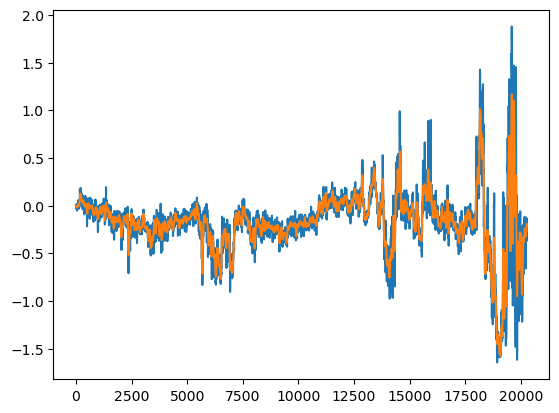

In [10]:
plt.plot(y)
plt.plot(y_smooth)

In [9]:
inlist = [folder+'defaultsMEC1/NSmicmac.tif',
    folder+'defaultsMEC3/NSmicmac.tif',
    folder+'defaultsMEC2/NSmicmac.tif',
    folder+'defaultsMEC4/NSmicmac.tif',
    folder+'defaultsMEC1/EWmicmac.tif',
    folder+'defaultsMEC3/EWmicmac.tif',
    folder+'defaultsMEC2/EWmicmac.tif',
    folder+'defaultsMEC4/EWmicmac.tif',
    folder+'defaultsMEC1/UDmicmac.tif',
    folder+'defaultsMEC3/UDmicmac.tif',
    folder+'defaultsMEC2/UDmicmac.tif',
    folder+'defaultsMEC4/UDmicmac.tif',
]
inlist2 = [folder+'EWDispStacked.tif',
    folder+'NSDispStacked.tif',
    folder+'UDDispStacked.tif']

In [10]:
# Filter all images
for file in [inlist2[0]]:
    im = gdal.Open(file)
    imdata = im.GetRasterBand(1).ReadAsArray()
    filtered = process_image(imdata, row_filter_type='band', row_cutoff_low=0.0005, row_cutoff_high=0.1,
                  col_filter_type=None, col_cutoff_low=0.001, col_cutoff_high=0.01, 
                  stripw=5000, window_type='hann', edge_ratio=0.1)
    
    # Save Files
    tt.save_geotiff(filtered,file[:-12]+f'{file[-12:-4]}_filtered.tif',im.GetGeoTransform(),im.GetProjection())

: 

In [13]:
1/0.0005

2000.0

In [19]:
im = gdal.Open(inlist[0])
imdata = im.GetRasterBand(1).ReadAsArray()[10000:,10000:]

In [22]:
filtered= process_image(imdata, row_filter_type='band', row_cutoff_low=0.001, row_cutoff_high=0.1,
                  col_filter_type=None, col_cutoff_low=0.001, col_cutoff_high=0.01, 
                  stripw=500, window_type='hann', edge_ratio=0.1)

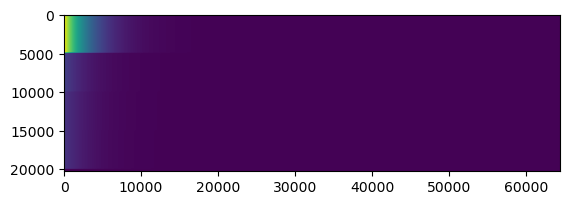

In [21]:
plt.imshow(filtered)
plt.show()